In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
from sklearn.metrics import mean_squared_error

# Weekday

In [36]:
df = pd.read_csv('formatted_data.csv')
df.head()

,trans_id,account_id,date,type,amount
0,695247,2378,1993-01-01,0,252.0
1,171812,576,1993-01-01,0,324.0
2,207264,704,1993-01-01,0,360.0
3,1117247,3818,1993-01-01,0,216.0
4,579373,1972,1993-01-02,0,144.0


In [41]:
test_user = df[df['account_id'] == 3116]
test_user.sort_values(by='date')
def mapping(val):
    if val == 0:
        return 'income'
    return 'expense'
test_user['type'] = test_user['type'].map(mapping)
split = int(len(test_user) * 0.8)
test_user_data = test_user[:split]
test_user_actual = test_user[split:]
test_user_input = test_user_actual.drop(['amount'], axis=1)


test_user_data.to_csv('test_user_data_3116.csv')
test_user_actual.to_csv('test_user_actual_3116.csv')
test_user_input.to_csv('test_user_input_3116.csv')



/var/folders/l9/951vvrv96qx81mc5lm6l3d140000gn/T/ipykernel_33781/1920470142.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_user['type'] = test_user['type'].map(mapping)


In [4]:
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

In [5]:
df['weekday'] = df['date'].dt.dayofweek
df['day'] = df['date'].dt.day
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year

In [6]:
df.head()

,trans_id,account_id,date,type,amount,weekday,day,month,year
0,695247,2378,1993-01-01,0,252.0,4,1,1,1993
1,171812,576,1993-01-01,0,324.0,4,1,1,1993
2,207264,704,1993-01-01,0,360.0,4,1,1,1993
3,1117247,3818,1993-01-01,0,216.0,4,1,1,1993
4,579373,1972,1993-01-02,0,144.0,5,2,1,1993


In [7]:
df = df.dropna(subset=['amount','date'])
df = df.drop(['date'], axis=1)
df = df[df['type'] == 1]

In [8]:
df.describe()

,trans_id,account_id,type,amount,weekday,day,month,year
count,6.345710e+05,634571.000000,634571.0,634571.000000,634571.000000,634571.000000,634571.000000,634571.000000
mean,8.609373e+05,2895.322495,1.0,1600.795271,3.007619,17.271432,6.448725,1996.537757
std,7.445944e+05,2444.605845,0.0,2655.196687,2.008219,9.900194,3.670362,1.370738
min,5.800000e+01,1.000000,1.0,0.000000,0.000000,1.000000,1.000000,1993.000000
25%,3.523735e+05,1196.000000,1.0,15.480000,1.000000,9.000000,3.000000,1996.000000
50%,7.058090e+05,2415.000000,1.0,735.120000,3.000000,14.000000,7.000000,1997.000000
75%,1.061698e+06,3623.000000,1.0,1872.000000,5.000000,29.000000,10.000000,1998.000000
max,3.682967e+06,11382.000000,1.0,31464.000000,6.000000,31.000000,12.000000,1998.000000


In [35]:
# import datetime as dt
# df['date'] = df['date'].map(dt.datetime.toordinal)
x = df.drop('amount', axis=1)
y = df['amount']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

x_train.head()

,trans_id,account_id,type,weekday,day,month,year
688808,2779752,9199,1,6,30,11,1997
141627,826317,2814,1,1,28,2,1995
776182,905142,3085,1,5,14,2,1998
103988,334213,1136,1,0,14,11,1994
829111,311979,1064,1,0,27,4,1998


In [10]:
from sklearn.ensemble import RandomForestRegressor


In [24]:
model = RandomForestRegressor(max_depth=3, n_estimators=500)

In [25]:
model.fit(x_train, y_train)

RandomForestRegressor(max_depth=3, n_estimators=500)

In [26]:




predictions = model.predict(x_test)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
print("MSE: {}, RMSE {}".format(mse, rmse))

MSE: 6143253.896054733, RMSE 2478.5588344953067


In [33]:
actual = y_test.reset_index(drop=True)
recreate = pd.concat([x_test, y_test], axis=1)
print(recreate.head(5))
result = pd.concat([actual, pd.Series(predictions, name='Prediction')], axis=1)
result.rename(columns={"amount": "Actual"}, inplace=True)
result.head(5)

        trans_id  account_id  type  weekday  day  month  year    amount
930656    914480        3116     1        6   23      8  1998  4284.000
349575   2439197        8041     1        2   31      7  1996     5.256
898633   2448798        8073     1        4   10      7  1998   250.200
278623    558102        1898     1        3   29      2  1996     5.256
331801    381394        1295     1        2   19      6  1996   324.000


,Actual,Prediction
0,4284.000,2572.698240
1,5.256,255.611293
2,250.200,2492.737202
3,5.256,906.216336
4,324.000,2572.698240


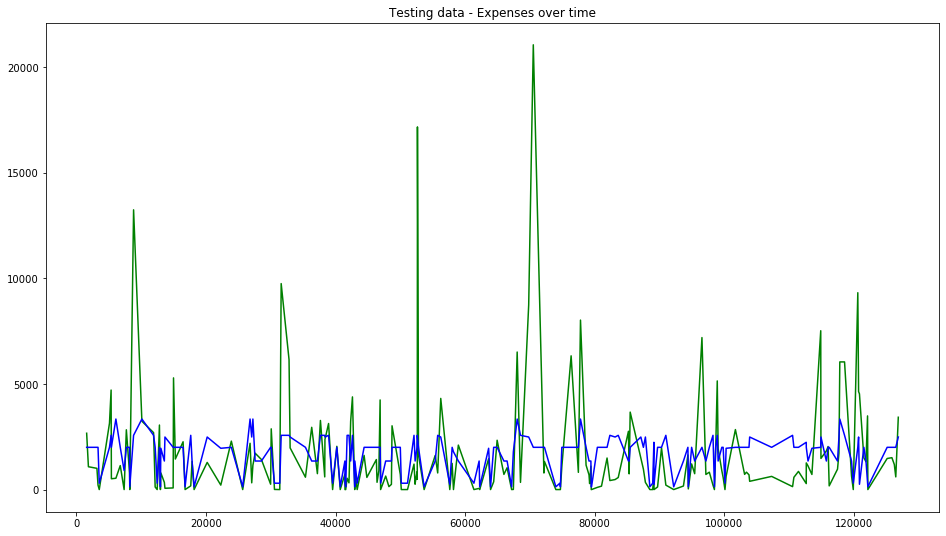

In [28]:
plt.figure(figsize=(16, 9))
plt.title('Testing data - Expenses over time')
sample = result.sample(200)
sample.sort_index(inplace=True)
plt.plot(sample['Actual'], color='green')
plt.plot(sample['Prediction'], color='blue')
plt.savefig('predictions/prediction2.png')
plt.show()

In [29]:
pd.DataFrame(data=[model.feature_importances_], columns=x.columns)

,trans_id,account_id,type,weekday,day,month,year
0,0.0,0.080566,0.0,0.0,0.796692,0.122739,0.000002


In [31]:
import joblib

joblib.dump(model, 'model.pkl')
lr = joblib.load('model.pkl')
columns = list(x_train.columns)
joblib.dump(columns, 'columns.pkl')

['columns.pkl']